# Weather reporting 
An NOAA dataset has been stored in the file data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

    id : station identification code
    date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
    element : indicator of element type
        TMAX : Maximum temperature (tenths of degrees C)
        TMIN : Minimum temperature (tenths of degrees C)
    value : data value for element (tenths of degrees C)

For this assignment, you must:

    Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
    Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
    Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
    Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    #df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    df = pd.read_csv('BinSize_d400.csv')

    station_locations_by_hash = df[df['hash'] == hashid]
    
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    
    return mplleaflet.display()

leaflet_plot_stations(400,'cfe15818c628b862ea7e1459e4c4e75ab3c8b84331b5ba3fbdbdebac')

C:\Users\kamoh\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
df = pd.read_csv('BinSize_d400.csv')

In [4]:
station_locations_by_hash = df[df['hash'] == 'cfe15818c628b862ea7e1459e4c4e75ab3c8b84331b5ba3fbdbdebac']
print('Ann Arbor, Michigan, United States')
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()
stations = station_locations_by_hash['NAME'].tolist()

Ann Arbor, Michigan, United States


In [5]:
# initial impresseion of the data
dfr=pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
dfr

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [6]:
dfr.Date.dtype

dtype('O')

In [7]:
#data types: Date column is just object, but it shall be converted to datetime type. Date_Value is int64 
# which needs to be converted to float to indicate tenth of degrees
dfr['Date'] =  pd.to_datetime(dfr['Date'])
dfr['Data_Value']=0.1*pd.to_numeric(dfr['Data_Value']) #conversion is done at the same time

In [8]:
dfr.Date.dtype

dtype('<M8[ns]')

In [9]:
#exclude leap days as suggested by the teacher
dfr = dfr[dfr['Date'] !='2008-02-29']
dfr = dfr[dfr['Date'] !='2012-02-29']

In [10]:
dfr.set_index('Date', inplace=True)
dfr.sort_index(inplace=True)
dfr

,ID,Element,Data_Value
Date,,,
2005-01-01,USW00014853,TMAX,5.6
2005-01-01,USC00201502,TMIN,-3.9
2005-01-01,USC00200228,TMAX,15.0
2005-01-01,USC00207320,TMAX,15.0
2005-01-01,USC00200228,TMIN,-3.9
...,...,...,...
2015-12-31,USC00200230,TMAX,0.0
2015-12-31,USC00200230,TMIN,-1.7
2015-12-31,USC00207312,TMAX,0.6


minrec = dfr['Data_Value'].min()

maxrec = dfr['Data_Value'].max()

dfr['Data_Value'].idxmax()

dfr['Data_Value'].idxmin()

In [11]:
#overlaid scatter plot indicates days in 2015 that broke a record high or low for 2005-2014

In [12]:
dfr

,ID,Element,Data_Value
Date,,,
2005-01-01,USW00014853,TMAX,5.6
2005-01-01,USC00201502,TMIN,-3.9
2005-01-01,USC00200228,TMAX,15.0
2005-01-01,USC00207320,TMAX,15.0
2005-01-01,USC00200228,TMIN,-3.9
...,...,...,...
2015-12-31,USC00200230,TMAX,0.0
2015-12-31,USC00200230,TMIN,-1.7
2015-12-31,USC00207312,TMAX,0.6


In [13]:
#variable number of data per station! It means that number of data for calculating the mean value of TMIN or TMAX in each day
# for all stations is varying. In this question we need a graph to show only the mean value for TMIN and TMAX for all stations
# for each day (mean value). 
# Using groupby first on Date we classify all data for a single day. Then we can use Element as the second item of groupby to
# classify only TMIN or only TMAX in a single day (of course for all stations). This will end up in a long list which is 
# boring and also time consuming and in fact not needed! What we need here is only the mean value, which can directly added to
# the groupby command using agg function. Arbitrarily we can add count, which shows how many TMIN or TMAX has been used for the
# calculation of mean in a single day.

dfr = dfr.groupby(['Date','Element']).agg(['mean','count'])
dfr

Data_Value      
                         mean count
Date       Element                 
2005-01-01 TMAX     10.860000    20
           TMIN     -3.309524    21
2005-01-02 TMAX      8.304762    21
           TMIN     -1.642105    19
2005-01-03 TMAX      8.525000    20
...                       ...   ...
2015-12-29 TMIN     -1.077778    18
2015-12-30 TMAX      3.605882    17
           TMIN     -0.323529    17
2015-12-31 TMAX      0.311765    17
           TMIN     -1.805556    18

[8030 rows x 2 columns]

In [14]:
dfr.columns = dfr.columns.droplevel(0) #drop one level
dfr

mean  count
Date       Element                  
2005-01-01 TMAX     10.860000     20
           TMIN     -3.309524     21
2005-01-02 TMAX      8.304762     21
           TMIN     -1.642105     19
2005-01-03 TMAX      8.525000     20
...                       ...    ...
2015-12-29 TMIN     -1.077778     18
2015-12-30 TMAX      3.605882     17
           TMIN     -0.323529     17
2015-12-31 TMAX      0.311765     17
           TMIN     -1.805556     18

[8030 rows x 2 columns]

#Remove any data before or after the period: 2005-2014:
dfr=dfr.loc['2005-01-01': '2014-12-31'] 
dfr

In [15]:
#pivot for tmin?
dfr = dfr.unstack()
dfr

mean           count     
Element          TMAX      TMIN  TMAX TMIN
Date                                      
2005-01-01  10.860000 -3.309524    20   21
2005-01-02   8.304762 -1.642105    21   19
2005-01-03   8.525000  0.838095    20   21
2005-01-04   2.431579 -0.445000    19   20
2005-01-05   0.745000 -4.771429    20   21
...               ...       ...   ...  ...
2015-12-27   6.355556  1.584211    18   19
2015-12-28   3.383333 -1.831579    18   19
2015-12-29   5.927778 -1.077778    18   18
2015-12-30   3.605882 -0.323529    17   17
2015-12-31   0.311765 -1.805556    17   18

[4015 rows x 4 columns]

In [16]:
#dfr=dfr['mean']
dfr = dfr.drop('count', 1)
dfr

mean          
Element          TMAX      TMIN
Date                           
2005-01-01  10.860000 -3.309524
2005-01-02   8.304762 -1.642105
2005-01-03   8.525000  0.838095
2005-01-04   2.431579 -0.445000
2005-01-05   0.745000 -4.771429
...               ...       ...
2015-12-27   6.355556  1.584211
2015-12-28   3.383333 -1.831579
2015-12-29   5.927778 -1.077778
2015-12-30   3.605882 -0.323529
2015-12-31   0.311765 -1.805556

[4015 rows x 2 columns]

In [17]:
dfr.index.dtype

dtype('<M8[ns]')

In [18]:
dfr.columns = dfr.columns.droplevel(0) #drop one level
dfr

Element,TMAX,TMIN
Date,,
2005-01-01,10.860000,-3.309524
2005-01-02,8.304762,-1.642105
2005-01-03,8.525000,0.838095
2005-01-04,2.431579,-0.445000
2005-01-05,0.745000,-4.771429
...,...,...
2015-12-27,6.355556,1.584211
2015-12-28,3.383333,-1.831579
2015-12-29,5.927778,-1.077778


In [19]:
#From this point we need to take 2 different slices from dfr to continue: dfr1 for 2005-2014 and dfr2 for 2015
#Remove any data before or after the period: 2005-2014 and take the rest as dfr1:
dfr1=dfr.loc['2005-01-01': '2014-12-31'] 
dfr1

Element,TMAX,TMIN
Date,,
2005-01-01,10.860000,-3.309524
2005-01-02,8.304762,-1.642105
2005-01-03,8.525000,0.838095
2005-01-04,2.431579,-0.445000
2005-01-05,0.745000,-4.771429
...,...,...
2014-12-27,8.655000,0.670000
2014-12-28,7.447368,-0.821053
2014-12-29,2.000000,-6.811765


In [20]:
#Take data for 2015 for the overlay graph as dfr2:
dfr2=dfr.loc['2015-01-01': '2015-12-31'] 
dfr2

Element,TMAX,TMIN
Date,,
2015-01-01,-3.200000,-9.861111
2015-01-02,0.278947,-6.977778
2015-01-03,1.805556,-4.800000
2015-01-04,1.620000,-2.710000
2015-01-05,-1.284211,-13.694737
...,...,...
2015-12-27,6.355556,1.584211
2015-12-28,3.383333,-1.831579
2015-12-29,5.927778,-1.077778


In [21]:
dfr1.index = dfr1.index.strftime('%m-%d')
dfr1

Element,TMAX,TMIN
Date,,
01-01,10.860000,-3.309524
01-02,8.304762,-1.642105
01-03,8.525000,0.838095
01-04,2.431579,-0.445000
01-05,0.745000,-4.771429
...,...,...
12-27,8.655000,0.670000
12-28,7.447368,-0.821053
12-29,2.000000,-6.811765


In [22]:
dfr2.index = dfr2.index.strftime('%m-%d')
dfr2

Element,TMAX,TMIN
Date,,
01-01,-3.200000,-9.861111
01-02,0.278947,-6.977778
01-03,1.805556,-4.800000
01-04,1.620000,-2.710000
01-05,-1.284211,-13.694737
...,...,...
12-27,6.355556,1.584211
12-28,3.383333,-1.831579
12-29,5.927778,-1.077778


In [23]:
dfr1.index.dtype

dtype('O')

In [24]:
dfr2.index.dtype

dtype('O')

In [25]:
dfr1.sort_index(inplace=True)
dfr1

C:\Users\kamoh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Element,TMAX,TMIN
Date,,
01-01,10.860000,-3.309524
01-01,11.809524,0.733333
01-01,-0.190000,-8.371429
01-01,0.625000,-9.515000
01-01,-3.418182,-13.268182
...,...,...
12-31,-0.266667,-3.505000
12-31,9.870000,0.900000
12-31,1.757895,-0.852632


In [26]:
dfr2.sort_index(inplace=True)
dfr2

Element,TMAX,TMIN
Date,,
01-01,-3.200000,-9.861111
01-02,0.278947,-6.977778
01-03,1.805556,-4.800000
01-04,1.620000,-2.710000
01-05,-1.284211,-13.694737
...,...,...
12-27,6.355556,1.584211
12-28,3.383333,-1.831579
12-29,5.927778,-1.077778


In [27]:
dff1 = dfr1.groupby('Date').agg('max')
dff1

Element,TMAX,TMIN
Date,,
01-01,11.809524,0.733333
01-02,8.304762,0.885714
01-03,8.525000,1.925000
01-04,8.915000,2.405263
01-05,10.294737,4.670588
...,...,...
12-27,11.828571,0.670000
12-28,14.710000,0.140000
12-29,8.083333,0.371429


In [28]:
dff2 = dfr2.groupby('Date').agg('max')
dff2

Element,TMAX,TMIN
Date,,
01-01,-3.200000,-9.861111
01-02,0.278947,-6.977778
01-03,1.805556,-4.800000
01-04,1.620000,-2.710000
01-05,-1.284211,-13.694737
...,...,...
12-27,6.355556,1.584211
12-28,3.383333,-1.831579
12-29,5.927778,-1.077778


In [29]:
type(dff1)

pandas.core.frame.DataFrame

In [30]:
type(dff2)

pandas.core.frame.DataFrame

In [31]:
dff1['TTmax1'] = dff1['TMAX']
dff1

Element,TMAX,TMIN,TTmax1
Date,,,
01-01,11.809524,0.733333,11.809524
01-02,8.304762,0.885714,8.304762
01-03,8.525000,1.925000,8.525000
01-04,8.915000,2.405263,8.915000
01-05,10.294737,4.670588,10.294737
...,...,...,...
12-27,11.828571,0.670000,11.828571
12-28,14.710000,0.140000,14.710000
12-29,8.083333,0.371429,8.083333


In [32]:
dff2['TTmax2'] = dff2['TMAX']
dff2

Element,TMAX,TMIN,TTmax2
Date,,,
01-01,-3.200000,-9.861111,-3.200000
01-02,0.278947,-6.977778,0.278947
01-03,1.805556,-4.800000,1.805556
01-04,1.620000,-2.710000,1.620000
01-05,-1.284211,-13.694737,-1.284211
...,...,...,...
12-27,6.355556,1.584211,6.355556
12-28,3.383333,-1.831579,3.383333
12-29,5.927778,-1.077778,5.927778


In [33]:
dff1['TTmin1'] = dfr1.groupby('Date').agg('min')['TMIN']
dff1

Element,TMAX,TMIN,TTmax1,TTmin1
Date,,,,
01-01,11.809524,0.733333,11.809524,-13.268182
01-02,8.304762,0.885714,8.304762,-13.957895
01-03,8.525000,1.925000,8.525000,-22.052632
01-04,8.915000,2.405263,8.915000,-18.310000
01-05,10.294737,4.670588,10.294737,-10.276190
...,...,...,...,...
12-27,11.828571,0.670000,11.828571,-8.926087
12-28,14.710000,0.140000,14.710000,-12.586364
12-29,8.083333,0.371429,8.083333,-10.280952


In [34]:
dff2['TTmin2'] = dfr2.groupby('Date').agg('min')['TMIN']
dff2

Element,TMAX,TMIN,TTmax2,TTmin2
Date,,,,
01-01,-3.200000,-9.861111,-3.200000,-9.861111
01-02,0.278947,-6.977778,0.278947,-6.977778
01-03,1.805556,-4.800000,1.805556,-4.800000
01-04,1.620000,-2.710000,1.620000,-2.710000
01-05,-1.284211,-13.694737,-1.284211,-13.694737
...,...,...,...,...
12-27,6.355556,1.584211,6.355556,1.584211
12-28,3.383333,-1.831579,3.383333,-1.831579
12-29,5.927778,-1.077778,5.927778,-1.077778


In [35]:
dff1 = dff1[['TTmin1','TTmax1']]
dff1

Element,TTmin1,TTmax1
Date,,
01-01,-13.268182,11.809524
01-02,-13.957895,8.304762
01-03,-22.052632,8.525000
01-04,-18.310000,8.915000
01-05,-10.276190,10.294737
...,...,...
12-27,-8.926087,11.828571
12-28,-12.586364,14.710000
12-29,-10.280952,8.083333


In [36]:
dff1.tail(10)

Element,TTmin1,TTmax1
Date,,
12-22,-18.481818,9.530000
12-23,-17.180000,10.323810
12-24,-12.289474,10.884211
12-25,-13.188889,6.690000
12-26,-10.015000,6.509524
12-27,-8.926087,11.828571
12-28,-12.586364,14.710000
12-29,-10.280952,8.083333
12-30,-11.571429,8.275000


In [37]:
dff2 = dff2[['TTmin2','TTmax2']]
dff2

Element,TTmin2,TTmax2
Date,,
01-01,-9.861111,-3.200000
01-02,-6.977778,0.278947
01-03,-4.800000,1.805556
01-04,-2.710000,1.620000
01-05,-13.694737,-1.284211
...,...,...
12-27,1.584211,6.355556
12-28,-1.831579,3.383333
12-29,-1.077778,5.927778


In [38]:
# criteria for overlay graph:
low2015 = dff2[dff2['TTmin2'] < dff1['TTmin1']]
low2015 = low2015.drop('TTmax2',1)
low2015

Element,TTmin2
Date,
01-05,-13.694737
01-10,-18.973684
01-11,-14.736842
01-13,-18.455000
02-02,-13.700000
02-03,-17.984211
02-13,-22.121053
02-14,-18.847368
02-15,-23.794444


In [39]:
type(low2015)

pandas.core.frame.DataFrame

In [40]:
high2015 = dff2[dff2['TTmax2'] > dff1['TTmax1']]
high2015 = high2015.drop('TTmin2',1)
high2015

Element,TTmax2
Date,
04-10,19.360000
05-07,24.057895
05-08,29.026316
05-09,29.360000
05-18,28.126316
07-27,30.442105
07-28,31.873684
07-29,32.365000
08-17,30.800000


In [41]:
dff = pd.merge(dff1,low2015, how='left',left_index = True, right_index=True)
dff

Element,TTmin1,TTmax1,TTmin2
Date,,,
01-01,-13.268182,11.809524,NaN
01-02,-13.957895,8.304762,NaN
01-03,-22.052632,8.525000,NaN
01-04,-18.310000,8.915000,NaN
01-05,-10.276190,10.294737,-13.694737
...,...,...,...
12-27,-8.926087,11.828571,NaN
12-28,-12.586364,14.710000,NaN
12-29,-10.280952,8.083333,NaN


In [42]:
dff = pd.merge(dff,high2015, how='left',left_index = True, right_index=True)
dff

Element,TTmin1,TTmax1,TTmin2,TTmax2
Date,,,,
01-01,-13.268182,11.809524,NaN,NaN
01-02,-13.957895,8.304762,NaN,NaN
01-03,-22.052632,8.525000,NaN,NaN
01-04,-18.310000,8.915000,NaN,NaN
01-05,-10.276190,10.294737,-13.694737,NaN
...,...,...,...,...
12-27,-8.926087,11.828571,NaN,NaN
12-28,-12.586364,14.710000,NaN,NaN
12-29,-10.280952,8.083333,NaN,NaN


In [43]:
dff.head(50)

Element,TTmin1,TTmax1,TTmin2,TTmax2
Date,,,,
01-01,-13.268182,11.809524,NaN,NaN
01-02,-13.957895,8.304762,NaN,NaN
01-03,-22.052632,8.525000,NaN,NaN
01-04,-18.310000,8.915000,NaN,NaN
01-05,-10.276190,10.294737,-13.694737,NaN
01-06,-17.615000,9.615789,NaN,NaN
01-07,-26.455000,14.847619,NaN,NaN
01-08,-25.070000,16.566667,NaN,NaN
01-09,-23.490000,13.980000,NaN,NaN


In [44]:
from datetime import datetime, timedelta

# generate list of dates from 01.01.2015 to 01.01.2015 through 1 day (year ill be deleted in the nex step. Because we
# need a date type object for the sake of visualization on the horizontal axis on a monthly basis)
x = np.arange(0,365,1)
dummydates = []
#establishin the starting date as dates[0] inside dates list
dummydates.append(datetime.strptime('2015-01-01', '%Y-%m-%d'))
dummydates

[datetime.datetime(2015, 1, 1, 0, 0)]

In [45]:
#type(days)
len(dummydates)

1

In [46]:
for d in x[1:]:
    d =d.astype('float64') #Maybe a bug: timedate doesn't function with int32!
    dummydates.append(dummydates[0] + timedelta(days = d))
dummydates

[datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 1, 2, 0, 0),
 datetime.datetime(2015, 1, 3, 0, 0),
 datetime.datetime(2015, 1, 4, 0, 0),
 datetime.datetime(2015, 1, 5, 0, 0),
 datetime.datetime(2015, 1, 6, 0, 0),
 datetime.datetime(2015, 1, 7, 0, 0),
 datetime.datetime(2015, 1, 8, 0, 0),
 datetime.datetime(2015, 1, 9, 0, 0),
 datetime.datetime(2015, 1, 10, 0, 0),
 datetime.datetime(2015, 1, 11, 0, 0),
 datetime.datetime(2015, 1, 12, 0, 0),
 datetime.datetime(2015, 1, 13, 0, 0),
 datetime.datetime(2015, 1, 14, 0, 0),
 datetime.datetime(2015, 1, 15, 0, 0),
 datetime.datetime(2015, 1, 16, 0, 0),
 datetime.datetime(2015, 1, 17, 0, 0),
 datetime.datetime(2015, 1, 18, 0, 0),
 datetime.datetime(2015, 1, 19, 0, 0),
 datetime.datetime(2015, 1, 20, 0, 0),
 datetime.datetime(2015, 1, 21, 0, 0),
 datetime.datetime(2015, 1, 22, 0, 0),
 datetime.datetime(2015, 1, 23, 0, 0),
 datetime.datetime(2015, 1, 24, 0, 0),
 datetime.datetime(2015, 1, 25, 0, 0),
 datetime.datetime(2015, 1, 26, 0,

In [47]:
len(dummydates)

365

In [48]:
dff.index = pd.Series(dummydates)
dff

Element,TTmin1,TTmax1,TTmin2,TTmax2
2015-01-01,-13.268182,11.809524,NaN,NaN
2015-01-02,-13.957895,8.304762,NaN,NaN
2015-01-03,-22.052632,8.525000,NaN,NaN
2015-01-04,-18.310000,8.915000,NaN,NaN
2015-01-05,-10.276190,10.294737,-13.694737,NaN
...,...,...,...,...
2015-12-27,-8.926087,11.828571,NaN,NaN
2015-12-28,-12.586364,14.710000,NaN,NaN
2015-12-29,-10.280952,8.083333,NaN,NaN
2015-12-30,-11.571429,8.275000,NaN,NaN


In [49]:
dff.index.dtype

dtype('<M8[ns]')

# MATPLOTLIB

In [50]:
%matplotlib notebook

In [51]:
import matplotlib as mpl
import matplotlib.dates as mdates
mpl.get_backend()

'nbAgg'

In [52]:
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter, MonthLocator

<IPython.core.display.Javascript object>


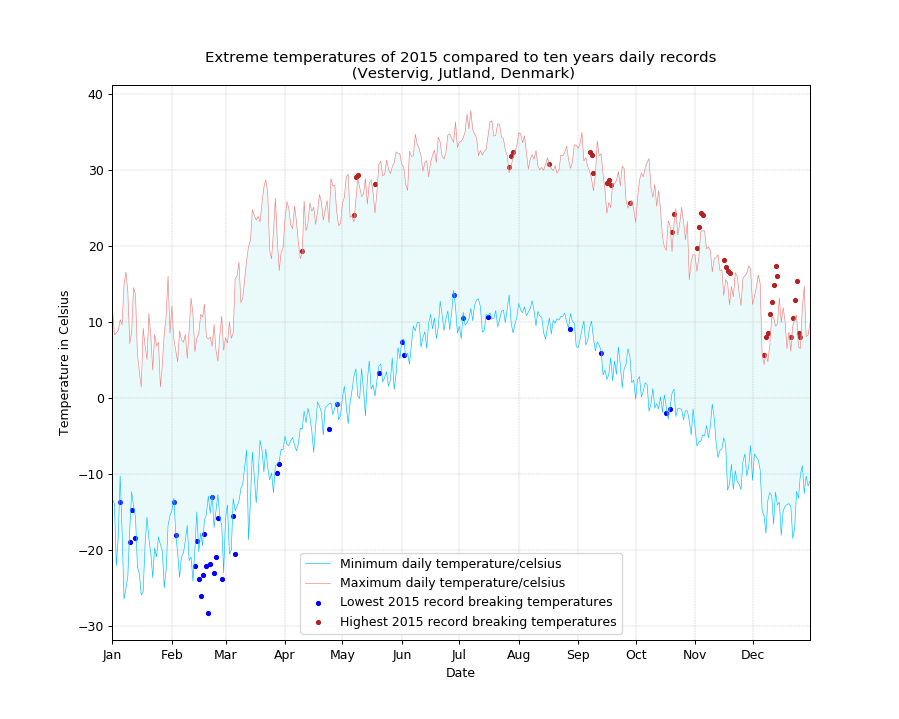

In [53]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')

ax.plot_date(dff.index, dff1['TTmin1'],'deepskyblue', linewidth=0.5, markersize=1)
ax.plot_date(dff.index, dff1['TTmax1'],'lightcoral', linewidth=0.5, markersize=1)


ax.scatter(dff.index, dff['TTmin2'],color='blue', s=10)
ax.scatter(dff.index, dff['TTmax2'],color='firebrick', s=10)

#To only show the months in x axis
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%b")) 

#To delete the default whitespace in the graph extents (default=0.05)
plt.margins(x=0)

In [54]:
dff1.index.dtype

dtype('O')

In [55]:
plt.xlabel('Date')
plt.ylabel('Temperature in Celsius')
plt.title('Extreme temperatures of 2015 compared to ten years daily records\n (Vestervig, Jutland, Denmark)')

# positioning the legend to lower center using bbox_to_anchor
plt.legend(['Minimum daily temperature/celsius', 'Maximum daily temperature/celsius','Lowest 2015 record breaking temperatures', 'Highest 2015 record breaking temperatures','Daily temperature variation'],
           bbox_to_anchor=(0.5, 0),
           loc='lower center')
plt.grid(color='gray', linestyle='-.', linewidth=0.2)

In [56]:
# fill the area between the linear data and exponential data
dates = list(dff.index)
plt.gca().fill_between(dates, 
                       dff['TTmin1'], dff['TTmax1'], 
                       facecolor='paleturquoise', 
                       alpha=0.25)